<a href="https://colab.research.google.com/github/minhoe/Gurobi/blob/main/LinearProgramming/Pyunghwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case study : Pyunghwa Electronics



### Sets and Define model
- Maximize the profit by producing two models(1,2)

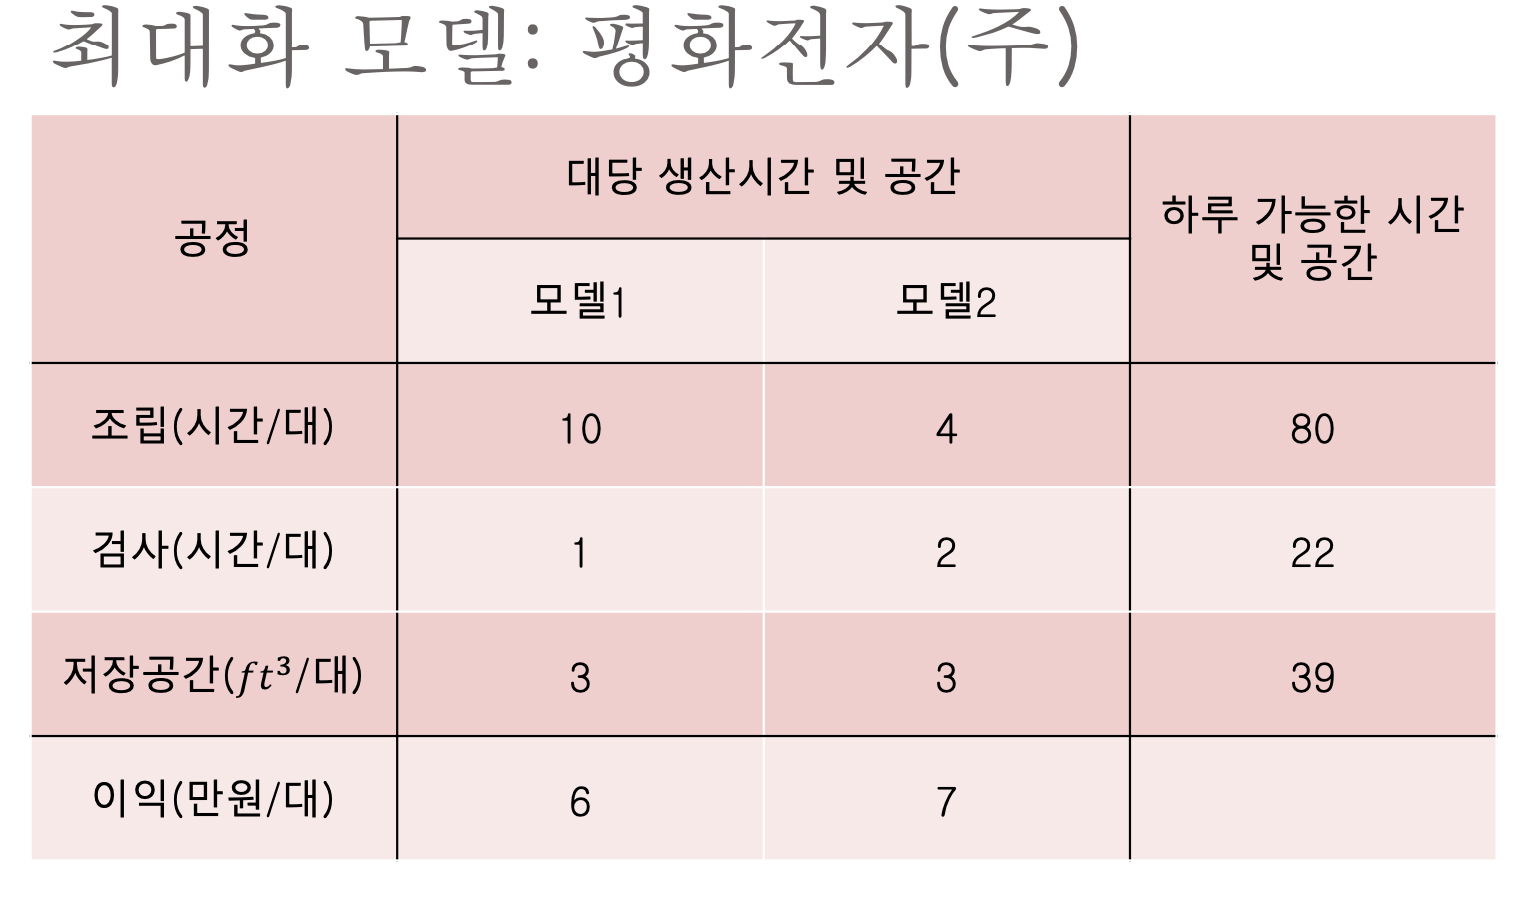

In [123]:
# Install gurobipy library if not installed
%pip install gurobipy

# Import packages
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

# Sets M and P, respectively
model = ['Model1', 'Model2']
process = ['Assembly(hr/unit)', 'Inspection(hr/unit)', 'Storage(ft3/unit)']

# Define a gurobipy model for the decision problem
m = gp.Model('pyunghwa')

### Set the coefficients
- Input/Output coefficients : for constraints
- Profit : for decision variables

In [124]:
# Coefficients
io_data = [[10, 4], [1, 2], [3, 3]]
io_coeff = pd.DataFrame(io_data, index = process, columns = model)
print('io_coeff :\n',io_coeff)

max_prod = pd.Series([80, 22, 39], index = process, name = 'max_production')
print('\nmax production :\n',max_prod)

profit = pd.Series([6, 7], index = model, name = 'unit_profit')
print('\nprofit :\n',profit)

io_coeff :
                      Model1  Model2
Assembly(hr/unit)        10       4
Inspection(hr/unit)       1       2
Storage(ft3/unit)         3       3

max production :
 Assembly(hr/unit)      80
Inspection(hr/unit)    22
Storage(ft3/unit)      39
Name: max_production, dtype: int64

profit :
 Model1    6
Model2    7
Name: unit_profit, dtype: int64


### Set the decision variables
- Model 1 : # of units to produce for Model 1
- Model 2 : # of units to produce for Model 2

In [125]:
# Add vars with the combination of process and model
x = m.addVars(model, name = 'model_to_produce')
m.update()

print(x)

{'Model1': <gurobi.Var model_to_produce[Model1]>, 'Model2': <gurobi.Var model_to_produce[Model2]>}


### Set the constraints

In [131]:
# for p in process:
#   m.addConstr((gp.quicksum(io_coeff[mi][p] * x[mi] for mi in model) <= max_prod[p]), name = 'adf')

m.addConstrs((gp.quicksum(io_coeff[mi][p] * x[mi] for mi in model) <= max_prod[p] for p in process), name = 'production_constraint')
m.addConstrs((x[mi] >= 0 for mi in model), name = 'nonnegative_constraint')
m.update()


Set the objective

In [132]:
m.setObjective(gp.quicksum(profit[m]*x[m] for m in model), GRB.MAXIMIZE)

# Write down the results
m.write('widget_shipment.lp')

# Optimization
m.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 14 rows, 2 columns and 26 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [6e+00, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 8e+01]
LP warm-start: use basis
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.7000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.700000000e+01


Extract the solution

In [133]:
all_vars = {v.varName: v.x for v in m.getVars()}
all_vars

{'model_to_produce[Model1]': 4.0, 'model_to_produce[Model2]': 9.0}

### Freeing Gurobi environment

In [ ]:
m.dispose()
gp.disposeDefaultEnv()